In [36]:
import pandas as pd
from datetime import datetime
#read csv
df =pd.read_csv('data/finaltrain.csv')
#head - 1st 5 rows
df.sample(6)



ID Delivery_person_ID  Delivery_person_Age  \
4670   0x130a     BANGRES08DEL02                 38.0   
3798   0x45a0      VADRES01DEL02                 22.0   
4931   0x7476     BANGRES17DEL02                 32.0   
9373   0xdfc7     KNPRES010DEL02                 38.0   
39268  0x73e9     SURRES010DEL01                 31.0   
3271   0x9a21      JAPRES01DEL02                 38.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
4670                       4.8            12.906229             77.596791   
3798                       4.0            22.307898             73.167788   
4931                       4.9            12.972532             77.608179   
9373                       4.9            26.477750             80.351569   
39268                      4.7            21.171060             72.789292   
3271                       4.6            26.905190             75.810753   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
4670                    12.926229                    77.616791  09-03-2022   
3798                    22.327898                    73.187788  24-03-2022   
4931                    13.102532                    77.738179  14-03-2022   
9373                    26.607750                    80.481569  16-02-2022   
39268                   21.211060                    72.829292  30-03-2022   
3271                    26.985190                    75.890753  29-03-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
4670        08:10             08:15              Sunny                  Low   
3798        10:35             10:45         Sandstorms                  Low   
4931        22:50             22:55              Sunny                  Low   
9373        17:10             17:15             Cloudy               Medium   
39268       12:50       0.541666667             Cloudy                 High   
3271            1          24:05:00         Sandstorms                  Low   

       Vehicle_condition Type_of_order   Type_of_vehicle  multiple_deliveries  \
4670                   2          Meal        motorcycle                  1.0   
3798                   0          Meal        motorcycle                  1.0   
4931                   0        Buffet        motorcycle                  1.0   
9373                   2         Snack  electric_scooter                  1.0   
39268                  0          Meal        motorcycle                  1.0   
3271                   1        Buffet        motorcycle                  NaN   

      Festival           City  Time_taken (min)  
4670        No  Metropolitian                16  
3798        No  Metropolitian                19  
4931        No  Metropolitian                21  
9373        No  Metropolitian                44  
39268       No  Metropolitian                34  
3271        No  Metropolitian                24

In [37]:

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [38]:
#Missing value check
df.isnull().sum()
#No null values

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [39]:
#No mising values values 

In [40]:
#Duplicate check ,
df.duplicated().sum()

0

In [41]:
#24 duplicates so remove it
df = df.drop_duplicates()
#Duplicate again check and ensure those removed
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [43]:
#Drop Id column since it has no influence in results

In [44]:
# Take a copy
df_back=df.copy()
#Remove unwanted column
df=df.drop(labels=["Delivery_person_ID",  "ID"],axis=1)
df.sample(5)

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
35855                 30.0                      4.0            19.109300   
8131                  22.0                      4.5             0.000000   
2263                  37.0                      3.1            22.310526   
19016                 39.0                      3.6            13.044694   
10215                 31.0                      4.6            23.354422   

       Restaurant_longitude  Delivery_location_latitude  \
35855             72.825451                   19.149300   
8131               0.000000                    0.070000   
2263              73.170937                   22.440526   
19016             80.261470                   13.124694   
10215             85.332900                   23.404422   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
35855                    72.865451  01-04-2022       14:30             14:35   
8131                      0.070000  06-03-2022       22:20             22:30   
2263                     73.300937  06-03-2022       22:25             22:40   
19016                    80.341470  04-04-2022       19:20             19:25   
10215                    85.382900  09-03-2022       18:15             18:25   

      Weather_conditions Road_traffic_density  Vehicle_condition  \
35855              Windy                 High                  1   
8131          Sandstorms                  Low                  1   
2263               Sunny                  Low                  0   
19016              Windy                  Jam                  1   
10215              Sunny               Medium                  0   

      Type_of_order Type_of_vehicle  multiple_deliveries Festival  \
35855          Meal      motorcycle                  1.0       No   
8131           Meal      motorcycle                  1.0       No   
2263         Buffet      motorcycle                  1.0       No   
19016        Drinks         scooter                  1.0       No   
10215        Drinks      motorcycle                  1.0       No   

                City  Time_taken (min)  
35855  Metropolitian                34  
8131           Urban                17  
2263   Metropolitian                33  
19016  Metropolitian                42  
10215  Metropolitian                21

In [45]:
#split order date to date , month year int

#df.sample(5)
df["Order_Date"].shape#45584


(45584,)

In [46]:
import datetime
df['date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')


# extract the day, month and year as integers
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df.sample(5)


Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
36986                 37.0                      4.2            11.003669   
18661                 36.0                      4.9            18.994237   
44186                 26.0                      4.6            12.323194   
5249                  39.0                      4.7             0.000000   
7837                  20.0                      4.8            21.152760   

       Restaurant_longitude  Delivery_location_latitude  \
36986             76.976494                   11.133669   
18661             72.825553                   19.054237   
44186             76.630583                   12.363194   
5249               0.000000                    0.130000   
7837              72.778059                   21.282760   

       Delivery_location_longitude  Order_Date  Time_Orderd Time_Order_picked  \
36986                    77.106494  08-03-2022        18:40             18:55   
18661                    72.885553  09-03-2022        23:10             23:25   
44186                    76.670583  09-03-2022        16:25             16:35   
5249                      0.130000  20-03-2022        23:15             23:30   
7837                     72.908059  20-03-2022  0.958333333             23:10   

      Weather_conditions  ... Type_of_order   Type_of_vehicle  \
36986              Windy  ...        Buffet        motorcycle   
18661             Stormy  ...         Snack  electric_scooter   
44186              Windy  ...         Snack           scooter   
5249              Stormy  ...        Drinks        motorcycle   
7837              Cloudy  ...         Snack           scooter   

      multiple_deliveries Festival           City Time_taken (min)       date  \
36986                 1.0       No  Metropolitian               45 2022-03-08   
18661                 0.0       No  Metropolitian               21 2022-03-09   
44186                 NaN       No  Metropolitian               24 2022-03-09   
5249                  1.0       No  Metropolitian               28 2022-03-20   
7837                  1.0       No  Metropolitian               20 2022-03-20   

       Day Month  Year  
36986    8     3  2022  
18661    9     3  2022  
44186    9     3  2022  
5249    20     3  2022  
7837    20     3  2022  

[5 rows x 22 columns]

In [47]:
#drop  Order_Date since it is splitted 
#df_back=df.copy()
df=df.drop(labels=["Order_Date","date"],axis=1)
df.head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 36.0                      4.2            30.327968   
1                 21.0                      4.7            10.003064   
2                 23.0                      4.7            18.562450   
3                 34.0                      4.3            30.899584   
4                 24.0                      4.7            26.463504   

   Restaurant_longitude  Delivery_location_latitude  \
0             78.046106                   30.397968   
1             76.307589                   10.043064   
2             73.916619                   18.652450   
3             75.809346                   30.919584   
4             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  Day  Month  Year  
0                46   12      2  2022  
1                23   13      2  2022  
2                21    4      3  2022  
3                20   13      2  2022  
4                41   14      2  2022

In [48]:
df['Time_Orderd'].describe()


count     43853
unique      176
top       21:55
freq        461
Name: Time_Orderd, dtype: object

In [49]:

# Replace on single column
df["Time_Orderd"] = df["Time_Orderd"].fillna('21:55')


In [50]:
#split time_ordered & Time_Order_picked hour minutes seconds

#print(df['Time_Order_picked'].unique())
df1=df.copy()#.sample(10)
hr=[]
min=[]
sec=[]
for i in df1['Time_Orderd']:
    #print('Dtype===',type(i))
 
    arr=str(i).split(':')
    print('==============',arr,type(arr)) 
   
    if i.count('.')>0:
        print('>>>>...............',arr[0])
        time=float(arr[0])
        
        total_seconds = (time* 24 * 3600)
        hours, remainder = divmod(total_seconds, 3600)
        minutes, seconds = divmod(remainder, 60)
   
        hr.append(int(hours))
        min.append(int(minutes))
        sec.append(int(seconds))
        print('..............,,',hours,'|',minutes,'|',seconds)
        
    elif i.count(':')==1:
        print('111111111111',arr)
        hr.append(int(arr[0]))
        min.append(int(arr[1]))
        sec.append(0)
    elif i.count(':')==2:
        print('22222222222222',arr)
        hr.append(int(arr[0]))
        min.append(int(arr[1]))
        sec.append(int(arr[2]))


df1['Order_Hr']  =hr
df1['Order_Min']  =min
df1['Order_Sec']  =sec
df1.sample(5)





============== ['21', '55'] <class 'list'>
111111111111 ['21', '55']
============== ['14', '55'] <class 'list'>
111111111111 ['14', '55']
============== ['17', '30'] <class 'list'>
111111111111 ['17', '30']
============== ['09', '20'] <class 'list'>
111111111111 ['09', '20']
============== ['19', '50'] <class 'list'>
111111111111 ['19', '50']
============== ['20', '25'] <class 'list'>
111111111111 ['20', '25']
============== ['14', '55'] <class 'list'>
111111111111 ['14', '55']
============== ['20', '30'] <class 'list'>
111111111111 ['20', '30']
============== ['20', '40'] <class 'list'>
111111111111 ['20', '40']
============== ['21', '15'] <class 'list'>
111111111111 ['21', '15']
============== ['20', '20'] <class 'list'>
111111111111 ['20', '20']
============== ['22', '30'] <class 'list'>
111111111111 ['22', '30']
============== ['08', '15'] <class 'list'>
111111111111 ['08', '15']
============== ['19', '30'] <class 'list'>
111111111111 ['19', '30']
============== ['12', '25'] <class

ValueError: Length of values (45154) does not match length of index (45584)

In [ ]:
df.shape

(45584, 20)

In [ ]:
df["Order_Date"].unique()
df["Day"]=(df["Order_Date"].str.split("-"))[0]


KeyError: 'Order_Date'

In [ ]:
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print(categorical_columns)
print(numerical_columns)

Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')


In [ ]:
df[categorical_columns].describe()

Order_Date Time_Orderd Time_Order_picked Weather_conditions  \
count        45584       43853             45584              44968   
unique          44         176               193                  6   
top     15-03-2022       21:55             21:30                Fog   
freq          1192         461               495               7653   

       Road_traffic_density Type_of_order Type_of_vehicle Festival  \
count                 44983         45584           45584    45356   
unique                    4             4               4        2   
top                     Low         Snack      motorcycle       No   
freq                  15476         11530           26429    44460   

                 City  
count           44384  
unique              3  
top     Metropolitian  
freq            34087

In [ ]:
df[numerical_columns].describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         43730.000000             43676.000000         45584.000000   
mean             29.566911                 4.633774            17.017948   
std               5.815064                 0.334744             8.185674   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.551440   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45584.000000                45584.000000   
mean              70.229684                   17.465480   
std               22.885575                    7.335562   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.897963                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
count                 45584.000000       45584.000000         44591.000000   
mean                     70.844161           1.023385             0.744635   
std                      21.120578           0.839055             0.572510   
min                       0.010000           0.000000             0.000000   
25%                      73.280000           0.000000             0.000000   
50%                      76.002574           1.000000             1.000000   
75%                      78.107044           2.000000             1.000000   
max                      88.563452           3.000000             3.000000   

       Time_taken (min)  
count      45584.000000  
mean          26.293963  
std            9.384298  
min           10.000000  
25%           19.000000  
50%           26.000000  
75%           32.000000  
max           54.000000

In [ ]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45584 entries, 0 to 45583
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Order_Date            45584 non-null  object
 1   Time_Orderd           43853 non-null  object
 2   Time_Order_picked     45584 non-null  object
 3   Weather_conditions    44968 non-null  object
 4   Road_traffic_density  44983 non-null  object
 5   Type_of_order         45584 non-null  object
 6   Type_of_vehicle       45584 non-null  object
 7   Festival              45356 non-null  object
 8   City                  44384 non-null  object
dtypes: object(9)
memory usage: 4.5+ MB


In [ ]:
df[numerical_columns].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 45584 entries, 0 to 45583
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Vehicle_condition            45584 non-null  int64  
 7   multiple_deliveries          44591 non-null  float64
 8   Time_taken (min)             45584 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 4.5 MB


In [ ]:
df[categorical_columns].describe()

Order_Date Time_Orderd Time_Order_picked Weather_conditions  \
count        45584       43853             45584              44968   
unique          44         176               193                  6   
top     15-03-2022       21:55             21:30                Fog   
freq          1192         461               495               7653   

       Road_traffic_density Type_of_order Type_of_vehicle Festival  \
count                 44983         45584           45584    45356   
unique                    4             4               4        2   
top                     Low         Snack      motorcycle       No   
freq                  15476         11530           26429    44460   

                 City  
count           44384  
unique              3  
top     Metropolitian  
freq            34087

In [ ]:
#Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df[i].unique())



Order_Date : ['12-02-2022' '13-02-2022' '04-03-2022' '14-02-2022' '02-04-2022'
 '01-03-2022' '16-03-2022' '20-03-2022' '15-02-2022' '10-03-2022'
 '11-03-2022' '27-03-2022' '26-03-2022' '05-04-2022' '12-03-2022'
 '01-04-2022' '05-03-2022' '11-02-2022' '08-03-2022' '03-04-2022'
 '30-03-2022' '28-03-2022' '18-03-2022' '14-03-2022' '06-04-2022'
 '04-04-2022' '24-03-2022' '19-03-2022' '09-03-2022' '25-03-2022'
 '02-03-2022' '13-03-2022' '29-03-2022' '31-03-2022' '17-03-2022'
 '07-03-2022' '15-03-2022' '16-02-2022' '03-03-2022' '18-02-2022'
 '23-03-2022' '17-02-2022' '06-03-2022' '21-03-2022']
Time_Orderd : ['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '20:40' '21:15'
 '20:20' '22:30' '08:15' '19:30' '12:25' '18:35' '20:35' '23:20' '21:20'
 '23:35' '22:35' '23:25' '13:35' '21:35' '18:55' '14:15' '0.458333333'
 '09:45' '08:40' '0.958333333' '17:25' nan '19:45' '19:10' '10:55' '21:40'
 '0.791666667' '16:45' '11:30' '15:10' '22:45' '22:10' '20:45' '22:50'
 '17:55' '09:25' '20:15' '22

In [ ]:
#Replace ? with most occuring item
print('Bef replace ? workclass',df['workclass'].unique())
print('Bef replace ?  occupation',df['occupation'].unique())
print('Bef replace ?  native_country',df['native-country'].unique())

df['workclass']  = df['workclass'].str.replace("?","Private",regex=True)
df['occupation']  = df['occupation'].str.replace("?","Prof-specialty",regex=True)
df['native-country']  = df['native-country'].str.replace("?","United-States",regex=True)

print('############### after replace ? to most frequest value\n workclass',df['workclass'].unique())
print('occupation',df['occupation'].unique())
print('native-country',df['native-country'].unique())
 

KeyError: 'workclass'

In [ ]:
#Confirm the '? ' replaces with most occuring 
for i in categorical_columns:
    print(i,':',df[i].unique())

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex : [' Male' ' Female']
native-country : [' United-States' ' Cuba' ' Jamaica' ' In

In [ ]:
#confirmed all ? replaced with mostly occuring char

In [ ]:
#'NAN' is coming a value in many categories,so we will replace this with most occuering value
#df[categorical_columns]  = df[categorical_columns].replace("?","<br>")
#df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 

In [ ]:
#Store clean data 

import os
clean_csv=os.path.join('data','adult_clean.csv')
#column name correcting 
dict = {'education-num': 'education_num',
        'marital-status': 'marital_status',
        'capital-gain': 'capital_gain',
		'capital-loss': 'capital_loss',
		'hours-per-week': 'hours_per_week',
		'native-country': 'native_country',
		'class': 'Class',
		}
 
# call rename () method
df.rename(columns=dict,         inplace=True)
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Cat colums - renamed to _',categorical_columns)
print('Num colums - renamed to _',numerical_columns)
     








Cat colums - renamed to _ Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'Class'],
      dtype='object')
Num colums - renamed to _ Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [ ]:
#convert to numeiric for  'class'
#df['Class']=df['Class'].astype(int)
#print('cat column ',categorical_columns)
list=[]
for i in df['Class']:
    if " <=50K" in i:
        list.append(40000)
    elif " >50K" in df['Class']:
        list.append(60000)
    else:
       list.append(60000) 
df['Class']=list
#[' <=50K' ' >50K']

In [ ]:
#Store cleaned csv 
df.to_csv(clean_csv,index=False)

In [ ]:
#Testing the stored csv
df1=pd.read_csv(clean_csv)
df1.describe()
print('Info of stored Data to doubel check ',df1.info())
print('Just double check the stored dataframe by reading it  #######\n',df1.head(5))

#Stored csv check - Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df1[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  Class           32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
Info of stored Data to doubel check  None
Just double check the stored dataframe by reading i

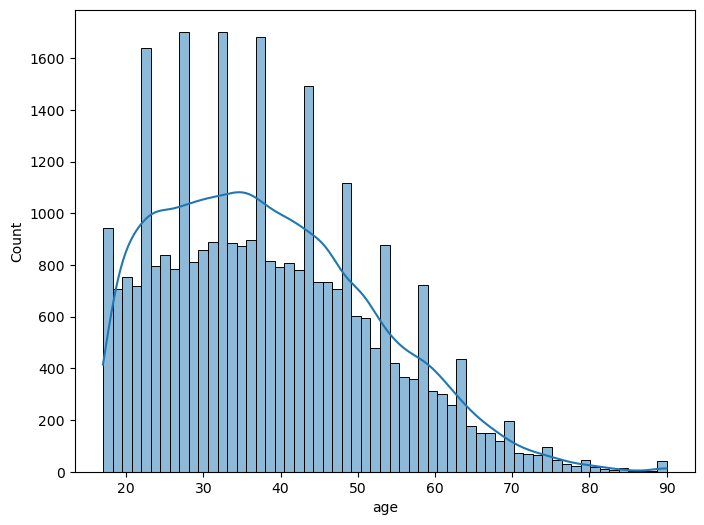

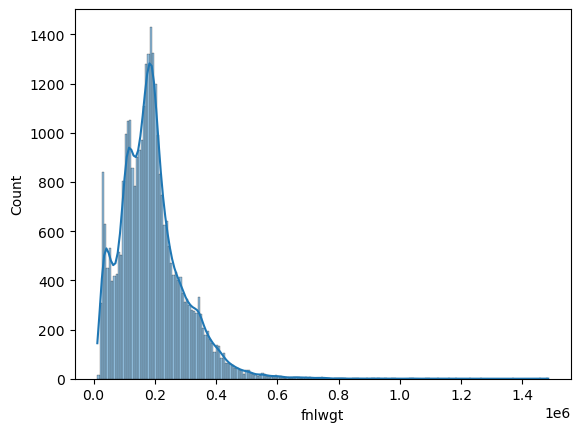

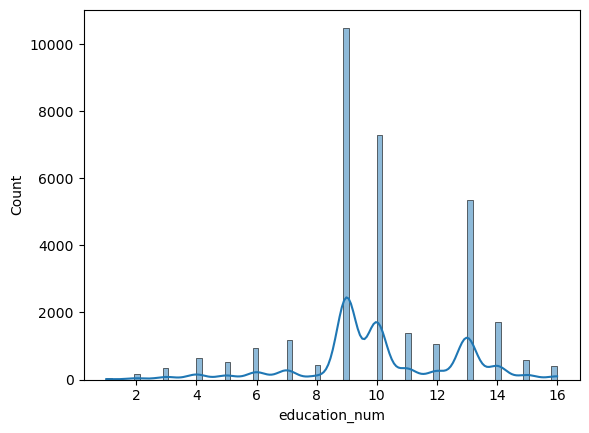

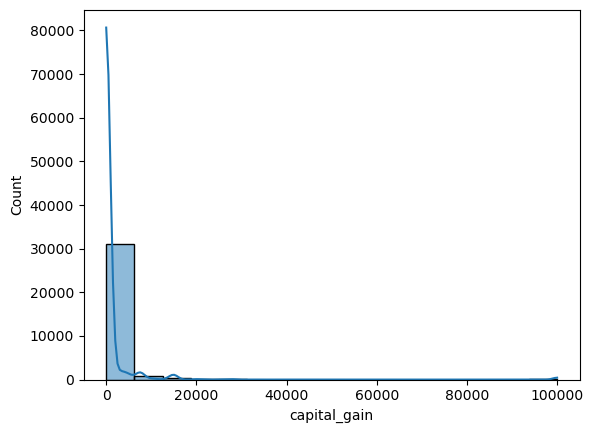

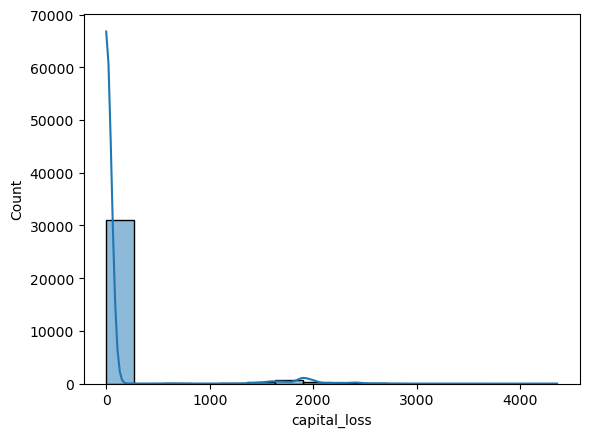

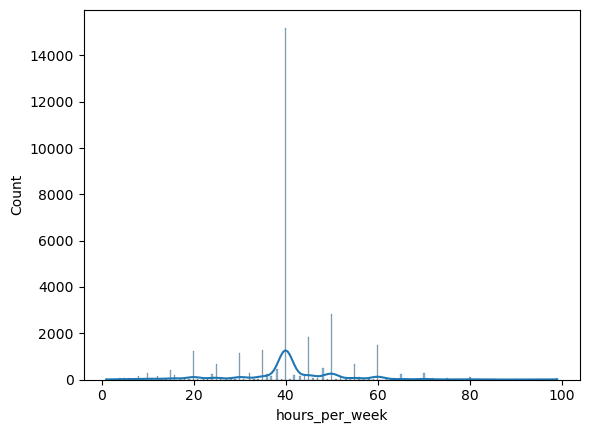

In [ ]:
#Histogram for numerical  columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

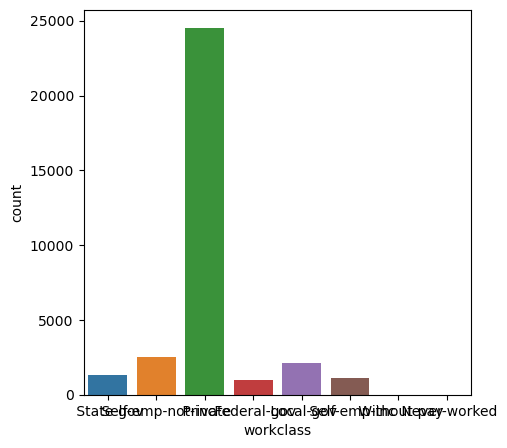

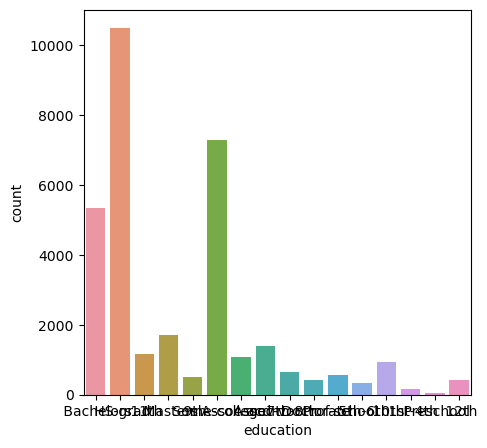

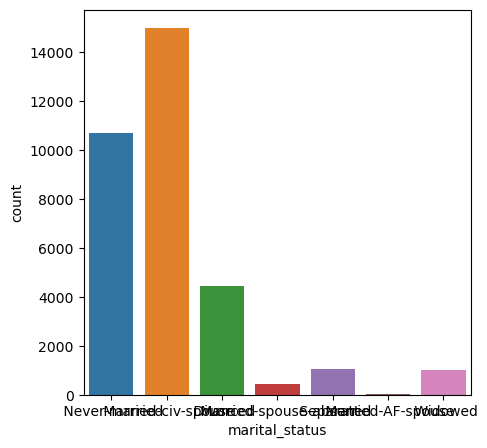

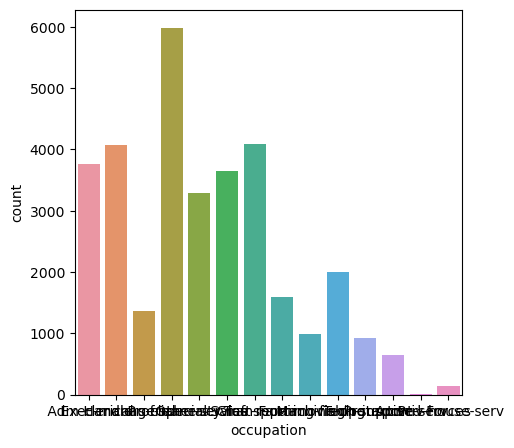

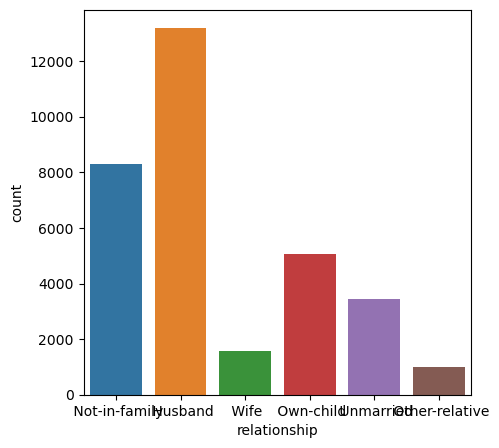

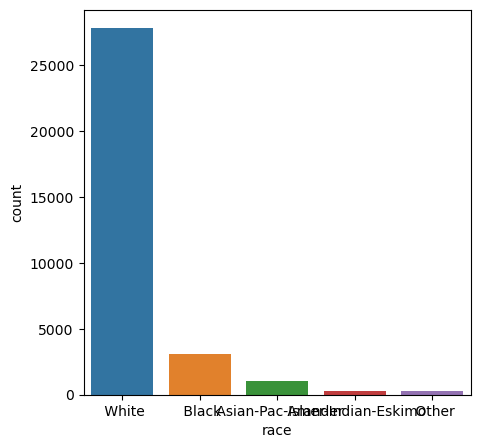

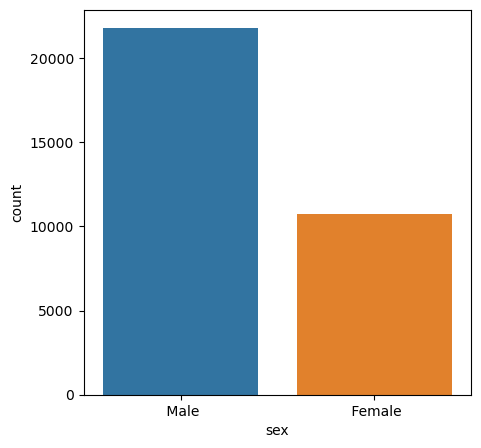

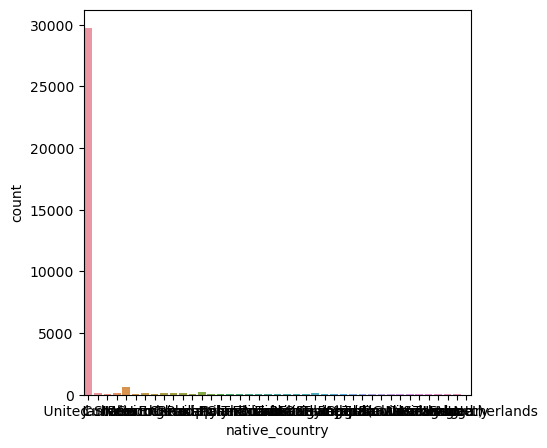

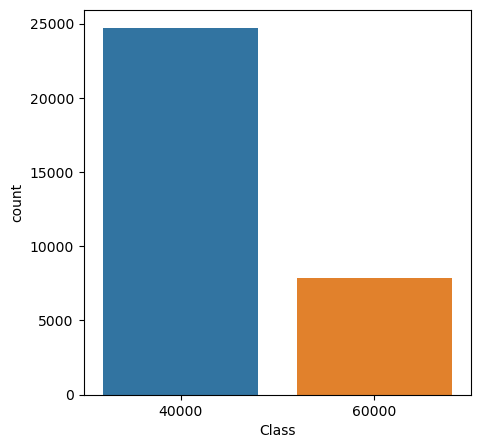

In [ ]:
#Categorical Plots
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x =i, data = df)
    print('\n')
    plt.show()

In [ ]:
#Strip plot - categorical columns
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(x =i, y ='class', data = df, jitter = True, dodge = True)
    print('\n')
    plt.show()

ValueError: Could not interpret value `class` for parameter `y`

<Figure size 500x500 with 0 Axes>

In [ ]:
#correlation
#sns.heatmap(df.corr(),annot=True)
#df.corr()
categorical_columns


In [ ]:
#df['cut'].value_counts()

In [ ]:
#cur_map={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5}
#df['color'].value_counts()

In [ ]:
##color_map={'G':1,'E':2,'F':3,'H':4,'D':5,'I':6,'J':7}
#df['clarity'].value_counts()

In [ ]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
color_map= {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df['clarity'].unique()
color_map={"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [ ]:
#map the dict fpr the categories to df
#df['color']=df['color'].map(color_map)
#df['clarity']=df['clarity'].map(clarity_map)
#df['cut']=df['cut'].map(cut_map)

In [ ]:
df.head()

In [ ]:
#correlation
df.corr()

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True,linewidths=.5)